
<img src= "img_murat/bob_ross.jpg" style="height:200px">



# Objectives

- Describe decision tree methods for classification and regression.

- Apply a decision tree regressor with sklearn.

- Define Gini impurity index, Shannon's entropy.

- Compare decision trees with the models we learnt before. 




## Regression Trees 
[dataset](https://www.kaggle.com/floser/hitters/downloads/hitters.zip/1)


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import baseball data and let's name it as hitters
hitters = pd.read_csv('data/Hitters.csv')
hitters.dropna(inplace  = True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
## we simplifty the data a little bit for the 
## discussion of the new topic
df_years = hitters.loc[:, ['Years', 'Hits']] 
df_years['salary'] = hitters.Salary.apply(np.log)
df_years.head()

,Years,Hits,salary
1,14,81,6.163315
2,3,130,6.173786
3,11,141,6.214608
4,2,87,4.516339
5,11,169,6.620073


<img src= "img_murat/hitters_salary2.png" style="height:400px">
<img src= "img_murat/partition_of_set.png" style="height:400px">
[img source: ISLR]

*predicting salary for someone - taking the average of the salaries of the people in the same group

__Your Turn__

- Use sklearn.tree to fit a DecisionTree (Hint: use DecisionTreeRegressor class)

- [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)



In [4]:
from sklearn import tree
estimator = tree.DecisionTreeRegressor()

X = df_years[['Years', 'Hits']]
y = df_years[['salary']]

# fit the model
estimator.fit(X, y)
# print the score
estimator.score(X, y)

0.9964804755929203

In [6]:
## Use trained estimator for making predictions

y_pred = estimator.predict(X)

### What is happening under the hood? 

- Divide the predictor space $X_1, X_2, \cdots X_k$ into distinct rectangles $R_1, \cdots, R_{k}$

- For every observation that falls into the region $R_j$ , we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

__Obvious questions__

- Why we divide rectangular regions?

- How to construct rectangles $R_1, \cdots, R_{j}$'s

__Goal__

Again we try to construct rectangles $R_j$ so that the residual suim of squares is minimum:

<img src= "img_murat/dt_least_square.png" style="height:100px">

__Problem__ with this approach is too complicated to find!! 

__Solution?__ Greedy algorithm!!

Instead of finding best partition, start from one variable and do the best partition.



__Final Algorithm__
 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.

<img src= "img_murat/Partition_with_5_boxes_ISLR.png" style="height:300px">

<img src= "img_murat/graph_of_partition_with_5_boxes.png" style="height:300px">



### Possible Problems:

- Good for training but not for test --> Can you see why?

- Overfitting is a common thing with decision trees: Solution is __Tree Pruning!__


<img src= "img_murat/pruning.jpg" style="height:250px">


[Let's check sklearn for pruning methods!!](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

For more on Tree pruning read pg: 307 from ISLR


In [7]:
df_sorted = df_years.sort_values(by = 'Hits')
X_sorted = df_sorted[['Years', 'Hits']]
y_pred = estimator.predict(X_sorted)

In [8]:
est_2 = tree.DecisionTreeRegressor(max_depth=2)

est_2.fit(X, y)

y_pred2 = est_2.predict(X_sorted)

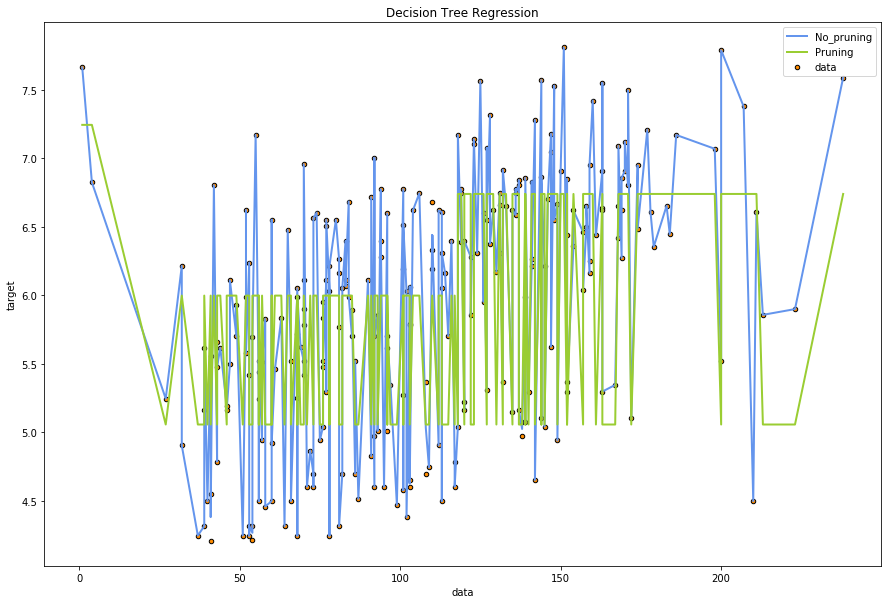

In [10]:
# Plot the results
plt.figure(figsize= (15, 10))
plt.scatter(df_years['Hits'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(df_sorted['Hits'], y_pred, color="cornflowerblue",
         label="No_pruning", linewidth=2)

plt.plot(df_sorted['Hits'], y_pred2, color="yellowgreen",
         label="Pruning", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [53]:
from sklearn.tree.export import export_text

r = export_text(est_2, feature_names= ['years', 'hits'])
print(r)

|--- years <= 4.50
|   |--- hits <= 15.50
|   |   |--- value: [7.24]
|   |--- hits >  15.50
|   |   |--- value: [5.06]
|--- years >  4.50
|   |--- hits <= 117.50
|   |   |--- value: [6.00]
|   |--- hits >  117.50
|   |   |--- value: [6.74]



In [18]:
import graphviz 
dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=['years', 'salary'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("baseball")


'baseball.pdf'

## Classification Trees


Q: Can we use the same algorithm?

Q1: What might go wrong?  Hint: RSS for classification?

Q2: What else can we use for classification?

### Classification Error Rate

<img src= "img_murat/classification_error_rate.png" style="height:100px">

### Gini Index

<img src= "img_murat/gini.png" style="height:100px">

### Shannon's Entropy

<img src= "img_murat/entropy.png" style="height:100px">

### Comparison of different impurity costs:

<img src= "img_murat/gini_classification_entropy.png" style="height:400px">


## Advantages of Tree Methods

[Sklearn Documentation](https://scikit-learn.org/stable/modules/tree.html)

<img src= "img_murat/advantages_of_trees.png" style="height:400px">

## Disadvantages of Tree Methods

<img src= "img_murat/disadvantages_of_trees.png" style="height:200px">


## Further Reading

Q: what is information gain criteria? 

[Watch this video](https://www.youtube.com/watch?v=LDRbO9a6XPU)

Q: What is ID3, C4.5 and CART?

[sklearn documentation 1.10.6](https://scikit-learn.org/stable/modules/tree.html)

Q: What are the tricky things that we should watch out in application?

[sklearn documentation 1.10.5 - Tips on Practical Use](https://scikit-learn.org/stable/modules/tree.html)

Q: Can sklearn plot the structure of a decision tree?

[Check this blog? I didn't fully read this though](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

More readings:

[ISLR - Chapter 8](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

[A 61 page chapter from a book. - Looks friendly :)](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)

[What is the difference btwn 'mse' vs 'friedman_mse'](https://projecteuclid.org/euclid.aos/1013203451)

[Categorical Variables with sklearn-trees](https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features)